## **RECONOCIMIENTO DE IMAGENES A COLOR**

### **Fuente de datos**

In [16]:
import os
import zipfile

local_zip='cats_and_dogs_small.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('D:\Estadistica\DeepLearn\Imagenes')
zip_ref.close()

In [17]:
# Declaracionde rutas de los archivos

Ruta_base='D:\Estadistica\DeepLearn\Imagenes\cats_and_dogs_small'

R_Train=os.path.join(Ruta_base,'train')
R_Valid=os.path.join(Ruta_base,'validation')
R_Test=os.path.join(Ruta_base,'test')

# Carpetas con las imagenes de entrenamiento

R_Train_Cats=os.path.join(R_Train,'cats')
R_Train_Dogs=os.path.join(R_Train,'dogs')

# Carpetas con las imagenes de validacion

R_Valid_Cats=os.path.join(R_Valid,'cats')
R_Valid_Dogs=os.path.join(R_Valid,'dogs')

# Carpetas con las imagenes de prueba

R_Test_Cats=os.path.join(R_Test,'cats')
R_Test_Dogs=os.path.join(R_Test,'dogs')

In [20]:
# Verificando lectura de archivos
# Entrenamiento
print('Verificando lectura de imagenes de entrenamiento...\n')
Train_cats_fnames=os.listdir(R_Train_Cats)
print(Train_cats_fnames[:5],'\n')

Train_dogs_fnames=os.listdir(R_Train_Dogs)
print(Train_dogs_fnames[:5],'\n')

# Validacion
print('Verificando lectura de imagenes de validacion...\n')
Valid_cats_fnames=os.listdir(R_Valid_Cats)
print(Train_cats_fnames[:5],'\n')

Valid_dogs_fnames=os.listdir(R_Valid_Dogs)
print(Valid_dogs_fnames[:5],'\n')

# Prueba
print('Verificando lectura de imagenes de prueba...\n')
Test_cats_fnames=os.listdir(R_Test_Cats)
print(Test_cats_fnames[:5],'\n')

Test_dogs_fnames=os.listdir(R_Test_Dogs)
print(Test_dogs_fnames[:5],'\n')

Verificando lectura de imagenes de entrenamiento...

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg'] 

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg'] 

Verificando lectura de imagenes de validacion...

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg'] 

['dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg'] 

Verificando lectura de imagenes de prueba...

['cat.1500.jpg', 'cat.1501.jpg', 'cat.1502.jpg', 'cat.1503.jpg', 'cat.1504.jpg'] 

['dog.1500.jpg', 'dog.1501.jpg', 'dog.1502.jpg', 'dog.1503.jpg', 'dog.1504.jpg'] 



In [21]:
# Verificacion de cantidad de archivos

print('Total de imagenes de entrenamiento\n')
print('Cats: ',len(os.listdir(R_Train_Cats)),'\n')
print('Dogs: ',len(os.listdir(R_Train_Dogs)),'\n\n')

print('Total de imagenes de validacion\n')
print('Cats: ',len(os.listdir(R_Valid_Cats)),'\n')
print('Dogs: ',len(os.listdir(R_Valid_Dogs)),'\n\n')

print('Total de imagenes de prueba\n')
print('Cats: ',len(os.listdir(R_Test_Cats)),'\n')
print('Dogs: ',len(os.listdir(R_Test_Dogs)),'\n\n')



Total de imagenes de entrenamiento

Cats:  1000 

Dogs:  1000 


Total de imagenes de validacion

Cats:  500 

Dogs:  500 


Total de imagenes de prueba

Cats:  500 

Dogs:  500 




### **Definición del modelo**

In [30]:
# Importando librerias

import tensorflow as tf
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten


In [ ]:
# Definicion del modelo

Modelo01=Sequential()
Modelo01.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
Modelo01.add(MaxPooling2D(2,2))
Modelo01.add(Conv2D(64,(3,3),activation='relu'))
Modelo01.add(MaxPooling2D(2,2))
Modelo01.add(Conv2D(128,(3,3),activation='relu'))
Modelo01.add(MaxPooling2D(2,2))
Modelo01.add(Conv2D(128,(3,3),activation='relu'))
Modelo01.add(MaxPooling2D(2,2))
Modelo01.add(Flatten())
Modelo01.add(Dense(512,activation='relu'))
Modelo01.add(Dense(1,activation='sigmoid'))

Modelo01.summary()

c:\Users\Fernando\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Configuracion del modelo

from tensorflow.keras.optimizers import RMSprop

Modelo01.compile(optimizer=RMSprop(learning_rate =1e-4),loss='binary_crossentropy',metrics=['acc'])

### **Preprocesado**

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Se crean las instancias de los generadores necesarios para el preprocesamiento
Train_dt=ImageDataGenerator(rescale=1.0/255.)
Valid_dt=ImageDataGenerator(rescale=1.0/255.)
Test_dt=ImageDataGenerator(rescale=1.0/255.)

# Aplicacion de las instancias a las imagenes

Train_G=Train_dt.flow_from_directory(R_Train,batch_size=20,class_mode='binary',target_size=(150,150))

Valid_G=Valid_dt.flow_from_directory(R_Valid,batch_size=20,class_mode='binary',target_size=(150,150))

Test_G=Test_dt.flow_from_directory(R_Test,batch_size=20,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### **Entrenamiento del Modelo**

In [41]:
HST=Modelo01.fit(Train_G,steps_per_epoch=100,epochs=50,
validation_data=Valid_G,validation_steps=50,verbose=2)

Epoch 1/50
100/100 - 36s - 356ms/step - acc: 0.7840 - loss: 0.4540 - val_acc: 0.6950 - val_loss: 0.5645
Epoch 2/50
100/100 - 35s - 348ms/step - acc: 0.7965 - loss: 0.4356 - val_acc: 0.7090 - val_loss: 0.5522
Epoch 3/50
100/100 - 35s - 352ms/step - acc: 0.8095 - loss: 0.4156 - val_acc: 0.6960 - val_loss: 0.5795
Epoch 4/50
100/100 - 35s - 353ms/step - acc: 0.8295 - loss: 0.3857 - val_acc: 0.7140 - val_loss: 0.5823
Epoch 5/50
100/100 - 35s - 345ms/step - acc: 0.8400 - loss: 0.3719 - val_acc: 0.6880 - val_loss: 0.6939
Epoch 6/50
100/100 - 35s - 348ms/step - acc: 0.8500 - loss: 0.3527 - val_acc: 0.7200 - val_loss: 0.6094
Epoch 7/50
100/100 - 35s - 348ms/step - acc: 0.8565 - loss: 0.3350 - val_acc: 0.7200 - val_loss: 0.5753
Epoch 8/50
100/100 - 35s - 349ms/step - acc: 0.8730 - loss: 0.3052 - val_acc: 0.7340 - val_loss: 0.5559
Epoch 9/50
100/100 - 35s - 349ms/step - acc: 0.8775 - loss: 0.2910 - val_acc: 0.7460 - val_loss: 0.5536
Epoch 10/50
100/100 - 35s - 351ms/step - acc: 0.8870 - loss: 0.2

### **RESULTADOS**

<Figure size 640x480 with 0 Axes>

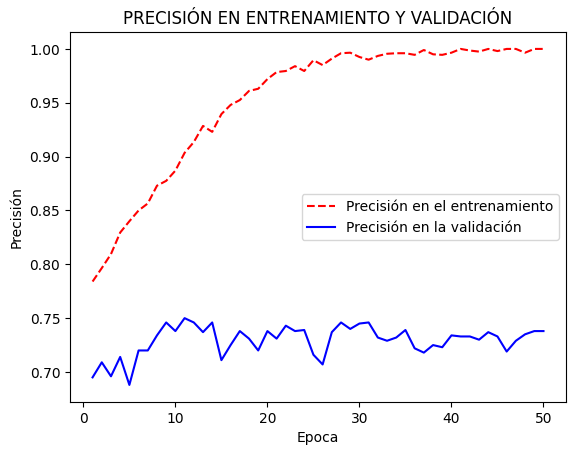

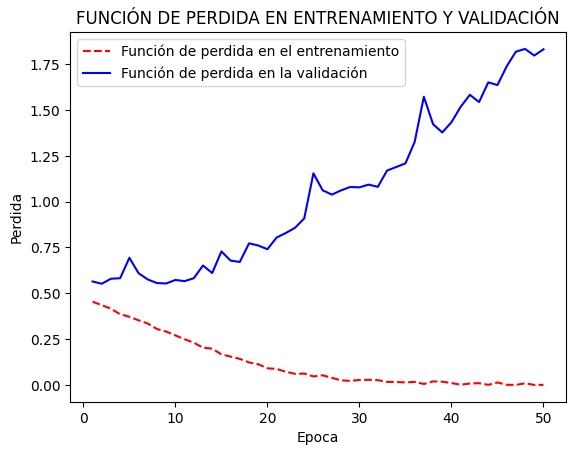

<Figure size 640x480 with 0 Axes>

In [42]:
# Visualizacion de resultados
import matplotlib.pyplot as plt

acc=HST.history['acc']
loss=HST.history['loss']
val_acc=HST.history['val_acc']
val_loss=HST.history['val_loss']

epocas=range(1,len(acc)+1,1)

plt.plot(epocas,acc,'r--',label='Precisión en el entrenamiento')
plt.plot(epocas,val_acc,'b',label='Precisión en la validación')
plt.title('PRECISIÓN EN ENTRENAMIENTO Y VALIDACIÓN')
plt.ylabel('Precisión')
plt.xlabel('Epoca')
plt.legend()
plt.figure()

plt.plot(epocas,loss,'r--',label='Función de perdida en el entrenamiento')
plt.plot(epocas,val_loss,'b',label='Función de perdida en la validación')
plt.title('FUNCIÓN DE PERDIDA EN ENTRENAMIENTO Y VALIDACIÓN')
plt.ylabel('Perdida')
plt.xlabel('Epoca')
plt.legend()
plt.figure()

In [45]:
# Resultado en el conjunto de test

test_loss, test_acc=Modelo01.evaluate(Test_G)
print('Precisión en la Prueba: ',test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - acc: 0.7319 - loss: 1.9563
Precisión en la Prueba:  0.7269999980926514
